In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt



c:\Users\peteramerkhanian\anaconda3\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\peteramerkhanian\AppData\Local\Temp\ipykernel_16800\1883136333.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shap

In [2]:
! pip install duckdb

     --------------------------------------- 10.0/10.0 MB 17.2 MB/s eta 0:00:00


In [48]:
# Load the shapefile
shapefile_path = "tl_2023_06_puma20.zip"
gdf_2020 = gpd.read_file(shapefile_path)

In [49]:
# Load the shapefile
shapefile_path = "tl_2021_06_puma10.zip"
gdf_2010 = gpd.read_file(shapefile_path)

06 00102

Alameda County (Northwest)--Oakland (Northwest) & Emeryville Cities PUMA

06 00103

Alameda County (Northeast)--Oakland (East) & Piedmont Cities PUMA

06 00104

Alameda County (North Central)--Oakland City (South Central) PUMA

In [50]:
oak_2020 = gdf_2020[gdf_2020['NAMELSAD20'].str.lower().str.contains('oakland')]

In [51]:
oak_2020

,STATEFP20,PUMACE20,GEOID20,GEOIDFQ20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
185,06,00111,0600111,795P200US0600111,Alameda County (Northwest)--Oakland City (Down...,G6120,S,27240901,8473733,+37.8160336,-122.2938475,"POLYGON ((-122.26649 37.83340, -122.26651 37.8..."
230,06,00123,0600123,795P200US0600123,Alameda County (Northwest)--Oakland City (San ...,G6120,S,14985193,677599,+37.7883397,-122.2301309,"POLYGON ((-122.23340 37.80438, -122.23329 37.8..."
245,06,00112,0600112,795P200US0600112,Alameda County (Northwest)--Oakland City (Oakl...,G6120,S,60860438,187919,+37.8089449,-122.1921159,"POLYGON ((-122.20498 37.79736, -122.20553 37.7..."
268,06,00113,0600113,795P200US0600113,Alameda County (West)--Oakland City (Elmhurst/...,G6120,S,41854495,4598674,+37.7451900,-122.1973468,"POLYGON ((-122.16050 37.73761, -122.16079 37.7..."


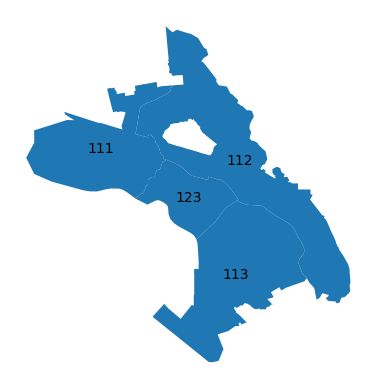

In [215]:

ax = oak_2020.plot()
for idx, row in oak_2020.iterrows():
    label_polygon(ax, row['PUMA'], row, idx, oak_2020, textsize=10)
ax.set_axis_off()

In [59]:
gdf_2010[gdf_2010['NAMELSAD10'].str.lower().str.contains('oakland')]

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
170,06,00103,0600103,Alameda County (Northeast)--Oakland (East) & P...,G6120,S,71571456,181836,+37.8041308,-122.1916059,"POLYGON ((-122.21356 37.85791, -122.21349 37.8..."
183,06,00105,0600105,"Alameda County (West)--San Leandro, Alameda & ...",G6120,S,80528395,159194033,+37.7118542,-122.2178896,"MULTIPOLYGON (((-122.11170 37.71295, -122.1117..."
184,06,00102,0600102,Alameda County (Northwest)--Oakland (Northwest...,G6120,S,40311300,11469048,+37.8128270,-122.2820917,"POLYGON ((-122.22098 37.79936, -122.22095 37.7..."
211,06,00104,0600104,Alameda County (North Central)--Oakland City (...,G6120,S,24002802,239048,+37.7620457,-122.1903690,"POLYGON ((-122.18681 37.73286, -122.18678 37.7..."


In [54]:
# Load the shapefile
shapefile_path = "tl_2023_06_place.zip"
places = gpd.read_file(shapefile_path)

In [55]:
places[places['NAMELSAD'].str.lower().str.contains('oakland')]

,STATEFP,PLACEFP,PLACENS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
326,06,53000,02411292,0653000,1600000US0653000,Oakland,Oakland city,25,C1,Y,G4110,A,144944705,57160794,+37.7698464,-122.2256900,"POLYGON ((-122.35588 37.83573, -122.35073 37.8..."


<AxesSubplot: >

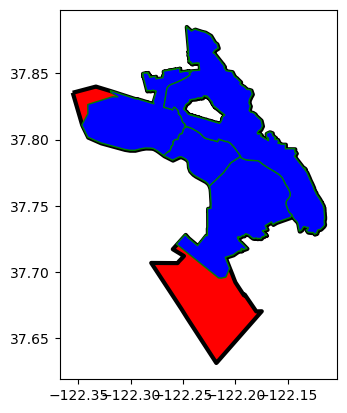

In [212]:
fig, ax  = plt.subplots()
# gdf_2010[gdf_2010['NAMELSAD10'].str.lower().str.contains('oakland')].plot(ax=ax, alpha=1, color="orange", edgecolor="red")
places[places['NAMELSAD'].str.lower().str.contains('oakland')].plot(ax=ax, alpha=1, color='red', linewidth=3, edgecolor="black")
gdf_2020[gdf_2020['NAMELSAD20'].str.lower().str.contains('oakland')].plot(ax=ax, alpha=1, color="blue", edgecolor="green")


In [60]:
import pandas as pd

In [61]:
df = pd.read_csv("usa_00015.csv")

In [189]:
df_oak = df[(df['COUNTYFIP'] == 1) &
   df['PUMA']
   .astype(str)
   .isin(oak_2020['PUMACE20'].str.strip("0").tolist()) &
   ((df['FTOTINC'] < 9999999) & (df['FTOTINC'] > 0))
   ] 

In [190]:
incomes = df_oak.groupby('PUMA')['FTOTINC'].mean().round().reset_index()

In [191]:
import seaborn as sns

In [192]:
df_oak['PUMA'] = df_oak['PUMA'].astype(str)

C:\Users\peteramerkhanian\AppData\Local\Temp\ipykernel_18480\3529083284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oak['PUMA'] = df_oak['PUMA'].astype(str)


In [193]:
incomes['PUMA'] = incomes['PUMA'].astype(str)
incomes

,PUMA,FTOTINC
0,111,157739.0
1,112,263020.0
2,113,107296.0
3,123,109716.0


In [194]:
oak_2020['PUMA'] = oak_2020.copy()['PUMACE20'].str.strip("0")

c:\Users\peteramerkhanian\anaconda3\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [195]:
def label_polygon(ax, label, row, idx, iter_df, textsize=10):
    if row.geometry.geom_type == 'MultiPolygon':
        for polygon in iter_df['geometry'][idx].geoms:
            ax.annotate(text=label,
                        size=textsize,
                        xy=(polygon.centroid.x, polygon.centroid.y),
                        horizontalalignment='center', verticalalignment='center')
    else:
        ax.annotate(text=label,
                    size=textsize,
                    xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                    horizontalalignment='center', verticalalignment='center')

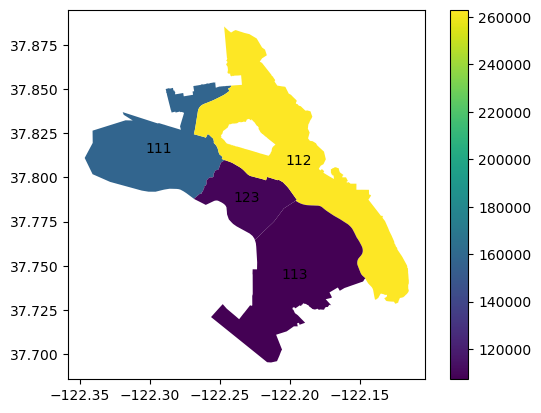

In [197]:
ax = oak_2020.merge(incomes, on="PUMA").plot(column='FTOTINC', legend=True)
for idx, row in oak_2020.iterrows():
    label_polygon(ax, row['PUMA'], row, idx, oak_2020, textsize=10)

<AxesSubplot: xlabel='PUMA', ylabel='FTOTINC'>

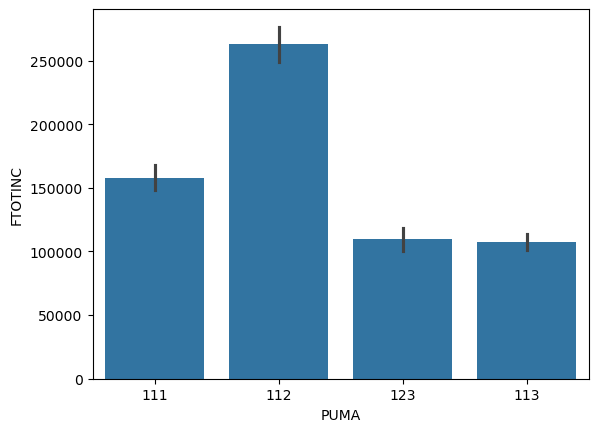

In [198]:
sns.barplot(x="PUMA", y="FTOTINC", data=df_oak)

<AxesSubplot: xlabel='FTOTINC', ylabel='PUMA'>

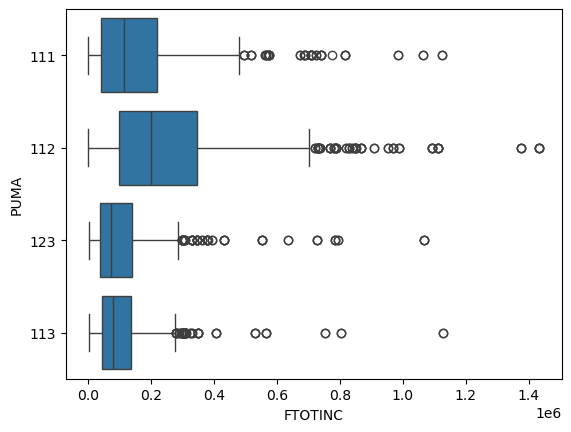

In [199]:
sns.boxplot(x="FTOTINC", y="PUMA", data=df_oak)

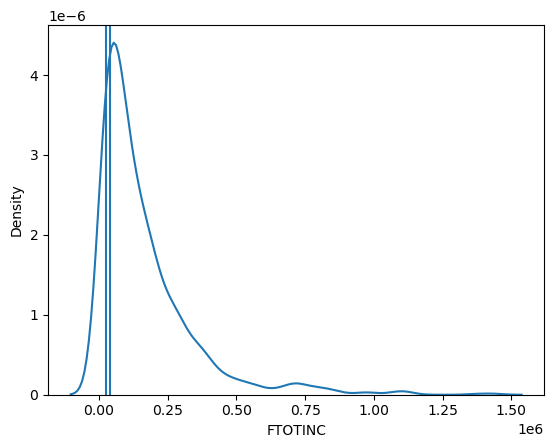

In [211]:
fig, ax = plt.subplots()
sns.kdeplot(x="FTOTINC", data=df_oak, ax=ax)
ax.axvline(39570)
ax.axvline(24470)

In [201]:
df_oak['sup_pov'] = (df_oak['FTOTINC'] < 39570).astype(int)
df_oak['pov'] = (df_oak['FTOTINC'] < 24470).astype(int)

C:\Users\peteramerkhanian\AppData\Local\Temp\ipykernel_18480\3674410578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oak['sup_pov'] = (df_oak['FTOTINC'] < 39570).astype(int)
C:\Users\peteramerkhanian\AppData\Local\Temp\ipykernel_18480\3674410578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oak['pov'] = (df_oak['FTOTINC'] < 24470).astype(int)


In [202]:
df_oak_18 = df_oak[df_oak['AGE'] > 18]

In [203]:
df_oak_18['pov'].mean()

0.1286730590782555

In [206]:
df_oak_18['sup_pov'].mean()

0.19764924218991647

In [205]:
(df_oak_18['pov'] * df_oak_18['PERWT']).sum()  / df_oak_18['PERWT'].sum()

0.1433069508286406

In [208]:
poverty = df_oak_18.groupby('PUMA')['sup_pov'].mean().round().reset_index()

<AxesSubplot: xlabel='PUMA', ylabel='pov'>

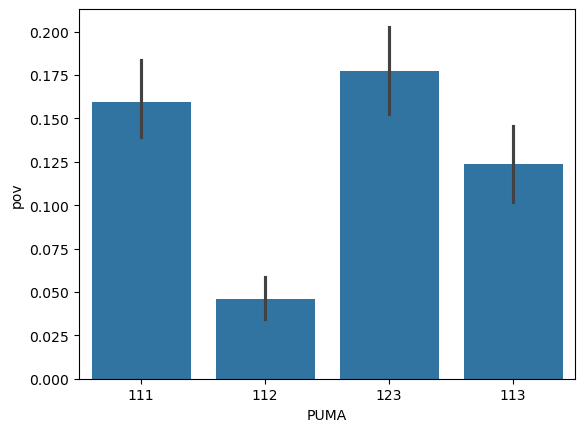

In [210]:
sns.barplot(x="PUMA", y="pov", data=df_oak)

<AxesSubplot: xlabel='PUMA', ylabel='sup_pov'>

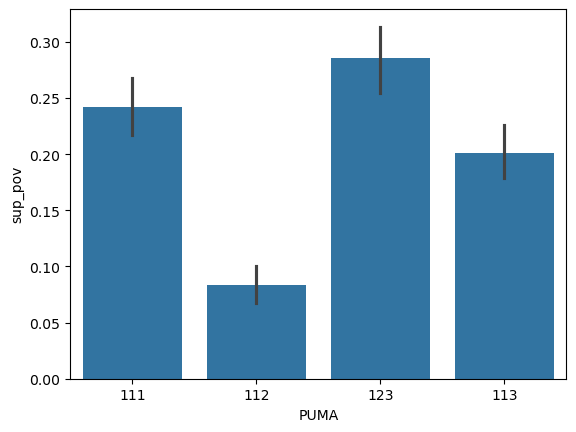

In [209]:
sns.barplot(x="PUMA", y="sup_pov", data=df_oak)

Show the change to PUMAs
Match the place-based 

In [188]:
df_oak_18

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,PUMA,STRATA,...,AGE,RACE,RACED,HISPAN,HISPAND,INCTOT,FTOTINC,INCWAGE,pov,sup_pov
386106,2022,202201,74737,2022010000467,56.0,2022000747371,6,1,111,11106,...,56,2,200,0,0,480,9999999,0,1,1
386107,2022,202201,74738,2022010000473,15.0,2022000747381,6,1,113,11306,...,34,8,802,0,0,1200,9999999,0,1,1
386374,2022,202201,75005,2022010002730,38.0,2022000750051,6,1,113,11306,...,40,1,100,0,0,41300,9999999,0,0,0
386488,2022,202201,75119,2022010003509,20.0,2022000751191,6,1,111,11106,...,88,1,100,0,0,5800,9999999,0,1,1
386585,2022,202201,75216,2022010004295,11.0,2022000752161,6,1,123,12306,...,59,2,200,0,0,480,9999999,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776855,2022,202201,233818,2022001444954,380.0,2022002338181,6,1,111,11106,...,31,4,400,0,0,1260,1260,1000,1,1
777122,2022,202201,233914,2022001446041,86.0,2022002339141,6,1,113,11306,...,85,2,200,0,0,18800,18800,0,1,1
777146,2022,202201,233924,2022001446193,56.0,2022002339241,6,1,123,12306,...,43,3,361,1,100,225000,225000,220000,0,0
777151,2022,202201,233926,2022001446218,76.0,2022002339261,6,1,113,11306,...,41,7,700,1,100,1100,54740,0,1,1
